In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

In [1]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

In [2]:
def gradient_descent(f, Df, x0, lr=0.1, epsilon=1e-6, max_iters=1000):
    x = x0
    trajectory = [x]
    for _ in range(max_iters):
        grad = Df(x)
        if abs(grad) < epsilon:
            break
        x -= lr * grad
        trajectory.append(x)
    return x, trajectory

In [3]:
def newtons_method(f, Df, DDf, x0, epsilon=1e-6, max_iters=1000):
    x = x0
    trajectory = [x]
    for _ in range(max_iters):
        grad = Df(x)
        hess = DDf(x)
        if abs(grad) < epsilon:
            break
        x -= grad / hess
        trajectory.append(x)
    return x, trajectory

In [4]:
# Initial conditions and parameters
x0 = 0  # Try different values
learning_rate = 0.1
epsilon = 1e-6

# Run optimizations
xmin_gd, traj_gd = gradient_descent(f, Df, x0, learning_rate, epsilon)
xmin_newton, traj_newton = newtons_method(f, Df, DDf, x0, epsilon)

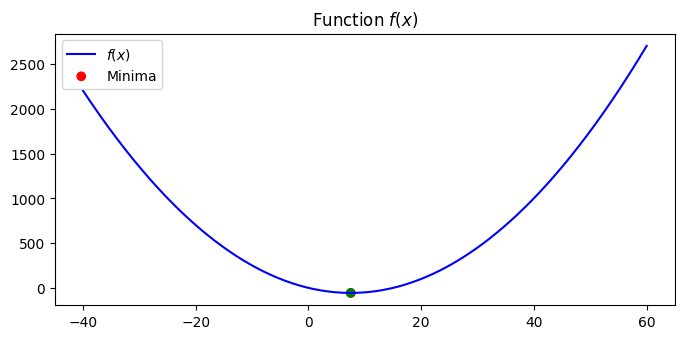

In [19]:
x_vals = np.linspace(-40, 60, 400)
y_vals = f(x_vals)
df_vals = Df(x_vals)
ddf_vals = DDf(x_vals) * np.ones_like(x_vals)

plt.figure(figsize=(8, 12))

# Function plot
plt.subplot(3, 1, 1)
plt.plot(x_vals, y_vals, label="$f(x)$", color='blue')
plt.scatter([xmin_gd, xmin_newton], [f(xmin_gd), f(xmin_newton)], color=['red', 'green'], label='Minima')
plt.title("Function $f(x)$")
plt.legend()

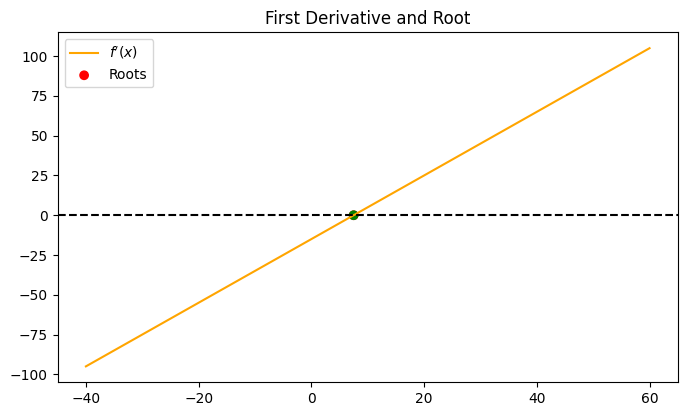

In [16]:
# Plot function and its derivatives
x_vals = np.linspace(-40, 60, 400)
y_vals = f(x_vals)
df_vals = Df(x_vals)
ddf_vals = DDf(x_vals) * np.ones_like(x_vals)

plt.figure(figsize=(8, 10))
# First derivative plot
plt.subplot(2, 1, 1)
plt.plot(x_vals, df_vals, label="$f'(x)$", color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([xmin_gd, xmin_newton], [Df(xmin_gd), Df(xmin_newton)], color=['red', 'green'], label='Roots')
plt.title("First Derivative and Root")
plt.legend()

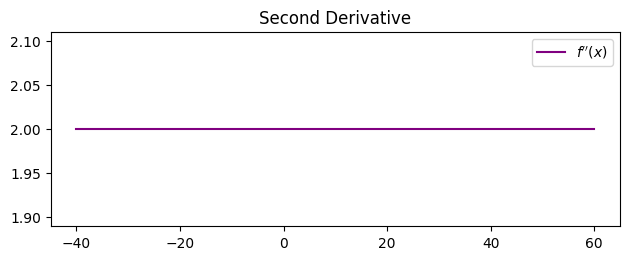

In [18]:
# Second derivative plot
plt.subplot(2, 1, 2)
plt.plot(x_vals, ddf_vals, label="$f''(x)$", color='purple')
plt.title("Second Derivative")
plt.legend()

plt.tight_layout()
plt.show()

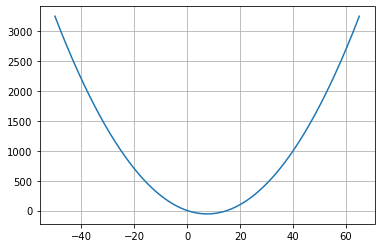

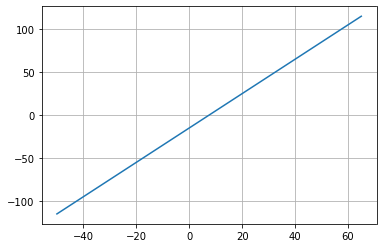

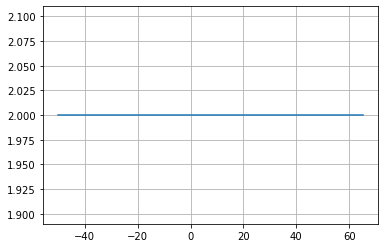

In [22]:
def gradient_descent1(f, Df, x0, lr=0.01, epsilon=0.1, max_iters=5000):
    x = x0
    for i in range(max_iters):
        grad = Df(x)
        if abs(grad) < epsilon:
            print(f"GD Results with x0 ={x0}, lr={lr}, epsilon={epsilon}")
            print(f"Found solution after {i} iterations.")
            print(f"x_min = {x}")
            print(f"Gradient = {grad}")
            return x
        x -= lr * grad
    print("Maximum iterations reached without convergence.")
    return x

# Initial conditions
x0 = 40
learning_rate = 0.01
epsilon = 0.1

# Run gradient descent
gradient_descent1(f, Df, x0, learning_rate, epsilon)

GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


7.549596800192111

In [27]:
def newtons_method1(f, Df, DDf, x0,lr, epsilon=0.1, max_iters=5000):
    x = x0
    for i in range(max_iters):
        grad = Df(x)
        hess = DDf(x)
        if abs(grad) < epsilon:
            print(f"Newton's Method Results with x0 ={x0}, epsilon={epsilon}")
            print(f"Found solution after {i} iterations.")
            print(f"x_min = {x}")
            print(f"Gradient = {grad}")
            return x
        x -= grad / hess
    print("Maximum iterations reached without convergence.")
    return x

# Initial conditions
x0 = 40
epsilon = 0.1
lr =0

# Run Newton's method
newtons_method1(f, Df, DDf, x0, epsilon)

Newton's Method Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


7.5

In [30]:
def newtons_method_with_gd(f, Df, DDf, x0, lr=0.8, epsilon=0.1, max_iters=5000):
    x = x0
    for i in range(max_iters):
        grad = Df(x)
        hess = DDf(x)
        if abs(grad) < epsilon:
            print(f"Newton's Method Results with x0 ={x0}, lr={lr}, epsilon={epsilon}")
            print(f"Found solution after {i} iterations.")
            print(f"x_min = {x}")
            print(f"Gradient = {grad}")
            return x
        x -= lr * (grad / hess)
    print("Maximum iterations reached without convergence.")
    return x

# Define function and its derivatives
f = lambda x: x**2 - 15*x + 1
Df = lambda x: 2*x - 15
DDf = lambda x: 2

# Initial conditions
x0 = 40
epsilon = 0.1
lr = 0.8

# Run Newton's method
newtons_method_with_gd(f, Df, DDf, x0, lr, epsilon)


Newton's Method Results with x0 =40, lr=0.8, epsilon=0.1
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


7.5104

### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [3]:
from sympy import *
from sympy.plotting import plot3d

In [2]:
pip install sympy


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - --------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
def mult_newton_method( df, ddf, x0, alpha=1, max_iter=500, tolerance=0.001):
    x = np.array(x0, dtype=float)
    history = [x.copy()]

    for i in range(max_iter):
        gradient = np.array(df(x))
        hessian = np.array(ddf(x))

        if np.linalg.norm(gradient) < tolerance:
            break

        if np.linalg.det(hessian) == 0:
            print("cannot proceed")
            break

        x = x - alpha * np.linalg.inv(hessian) @ gradient
        history.append(x.copy())

    print(f"Newton's Method Results with x0 = {x0}, lr={alpha}, epsilon={tolerance}")
    print(f"Found solution after {len(history) - 1} iterations.")
    print(f"x_min = {x}")
    print(f"Gradient = {gradient}")

    return x, gradient, history

In [7]:
def mult_gradient_descent(df, x0, alpha=0.1, max_iter=1000, epsilon=0.001):
    x = np.array(x0, dtype=float)
    history = [x.copy()]

    for i in range(max_iter):
        gradient = np.array(df(x))


        if np.linalg.norm(gradient) < epsilon:
            break


        x = x - alpha * gradient
        history.append(x.copy())


    print(f"Gradient Descent Results with x0 = {x0}, lr={alpha}, epsilon={epsilon}")
    print(f"Found solution after {len(history) - 1} iterations.")
    print(f"x_min = {x}")
    print(f"Gradient = {gradient}")

    return x, gradient, history

$𝒇(𝒙)=𝒙^𝟐+y^2$

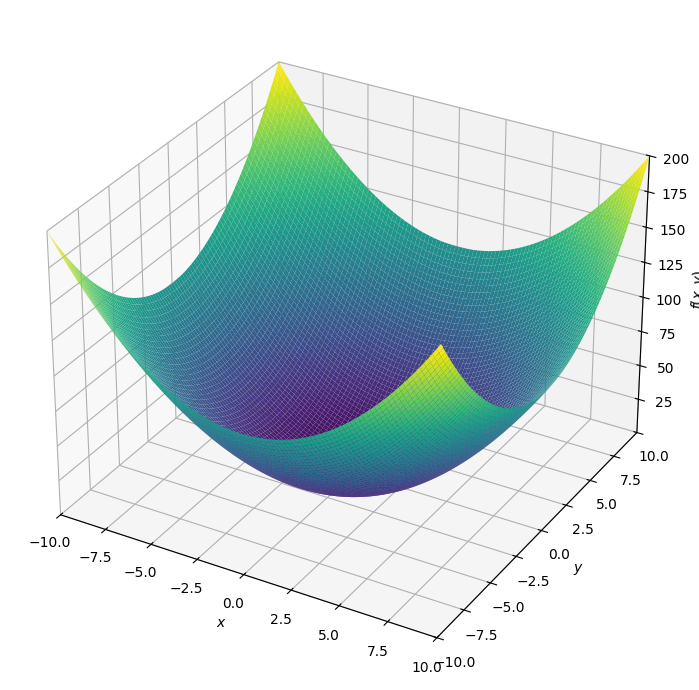

In [10]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

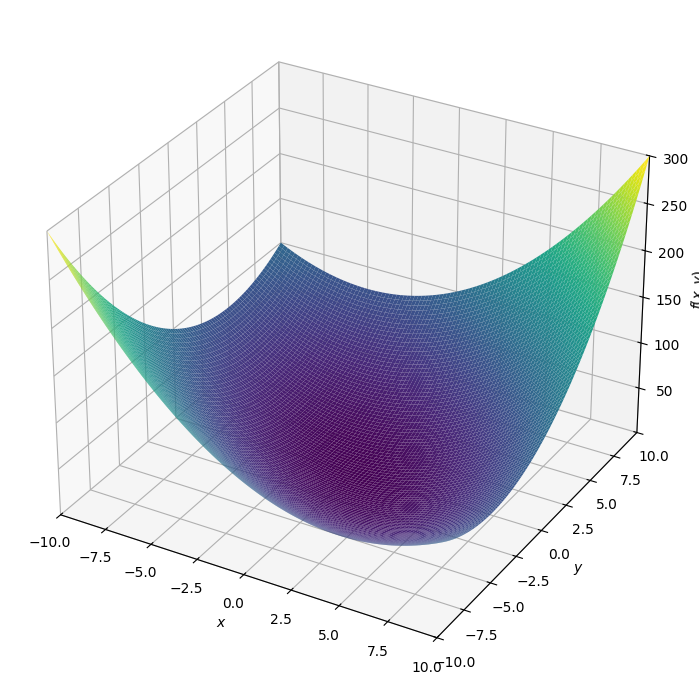

In [11]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

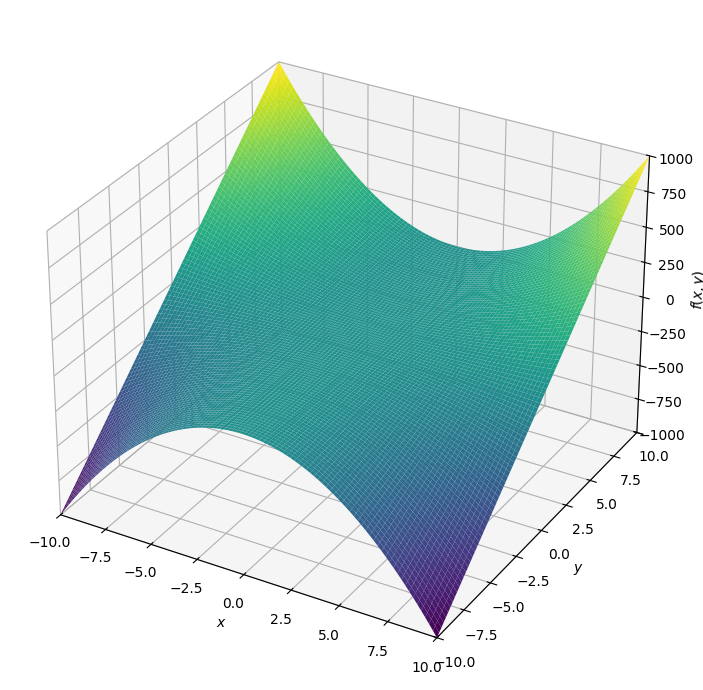

In [12]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [13]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [14]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [16]:
x1,df1,hist1=mult_gradient_descent(Df_1,x0=[10,10],alpha=0.1,max_iter=1000,epsilon=0.001)

Gradient Descent Results with x0 = [10, 10], lr=0.1, epsilon=0.001
Found solution after 46 iterations.
x_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


In [ ]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x1,df1,hist1=mult_gradient_descent(Df_1,x0=[10,10],alpha=0.5,max_iter=1000,epsilon=0.001)

Gradient Descent Results with x0 = [10, 10], lr=0.5, epsilon=0.001
Found solution after 1 iterations.
x_min = [0. 0.]
Gradient = [0. 0.]


In [18]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001
x1,df1,hist1=mult_newton_method(Df_1,DDf_1,x0=[10,10],alpha=0.5,max_iter=1000,tolerance=0.001)


Newton's Method Results with x0 = [10, 10], lr=0.5, epsilon=0.001
Found solution after 15 iterations.
x_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


In [19]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x2,df2,hist2=mult_gradient_descent(Df_2,x0=[10,10],alpha=0.5,max_iter=1000,epsilon=0.001)

Gradient Descent Results with x0 = [10, 10], lr=0.5, epsilon=0.001
Found solution after 16 iterations.
x_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [ ]:
x0 = (10, 10)
x_min, grad, history = mult_newton_method(Df_2, DDf_2, x0)

Newton's Method Results with x0 = (10, 10), lr=1, epsilon=0.001
Found solution after 1 iterations.
x_min = [1.77635684e-15 0.00000000e+00]
Gradient = [3.55271368e-15 1.77635684e-15]


In [26]:
f_3 = lambda x: x**2 * y
df_3 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
ddf_3 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [25]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [29]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001
x3, df3, hist3 = mult_newton_method(df_3, ddf_3, x0=[10,10], alpha=0.01, max_iter=1000, tolerance=0.001)

Newton's Method Results with x0 = [10, 10], lr=0.01, epsilon=0.001
Found solution after 1000 iterations.
x_min = [0.06653969 0.06653969]
Gradient = [0.00894428 0.00447214]


In [27]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x3,df3,hist3=mult_newton_method(df_3,ddf_3,x0=[10,10],alpha=1,max_iter=1000,tolerance=0.001)

Newton's Method Results with x0 = [10, 10], lr=1, epsilon=0.001
Found solution after 9 iterations.
x_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [33]:
def BFGS(Df, xk_1, x0, epsilon, learning_rate=1, max_iter=1000):
    x_prev = np.array(xk_1, dtype=float).reshape(-1, 1)  # Ensure column vector
    x_current = np.array(x0, dtype=float).reshape(-1, 1)  
    Df_prev = np.array(Df(x_prev)).reshape(-1, 1)  # Ensure column vector
    Df_current = np.array(Df(x_current)).reshape(-1, 1)  
    n = x_prev.shape[0]
    B_inv = np.eye(n)  # Initial inverse Hessian approximation
    iteration = 0

    print(f"xn_1:\n{x_prev}\nxn:\n{x_current}")
    print(f"Dfxn_1\n{Df_prev}\nDfxn\n{Df_current}")
    print(f"Gradient norm: {np.linalg.norm(Df_current)}")
    print("*****")

    while iteration < max_iter:
        s = x_current - x_prev  # Step size
        y = Df_current - Df_prev  # Gradient difference

        if np.abs(y.T @ s) <= 1e-10:  # Avoid division by near-zero
            print("Stopping due to small denominator in BFGS update.")
            break

        rho = 1.0 / (y.T @ s)
        I = np.eye(n)

        # BFGS formula update
        term1 = I - rho * np.outer(s, y)
        term2 = I - rho * np.outer(y, s)
        B_inv = term1 @ B_inv @ term2 + rho * np.outer(s, s)

        # Compute search direction
        d = -B_inv @ Df_current

        # Update x and gradient
        x_new = x_current + learning_rate * d
        Df_new = np.array(Df(x_new)).reshape(-1, 1)  # Ensure column vector

        print(f"Iteration {iteration + 1}:")
        print("B_inv\n", B_inv)
        print(f"xn_1:\n{x_current}\nxn:\n{x_new}")
        print(f"Dfxn_1\n{Df_current}\nDfxn\n{Df_new}")
        print(f"Gradient norm: {np.linalg.norm(Df_new)}")
        print("*****")

        # Stopping condition: gradient norm
        if np.linalg.norm(Df_new) < epsilon:
            print(f"Found solution after {iteration + 1} iterations.")
            print(f"x_min = \n{x_new}\nGradient = \n{Df_new}")
            return x_new, Df_new

        # Prepare for next iteration
        x_prev, x_current = x_current, x_new
        Df_prev, Df_current = Df_current, Df_new

        iteration += 1

    print(f"Max iterations reached. Final solution:\n{x_current}")
    return x_current, Df_current

In [34]:
x_min, grad_min = BFGS(Df_1, xk_1=(10,10), x0=(9,9), epsilon=0.001)

xn_1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn_1
[[20.]
 [20.]]
Dfxn
[[18.]
 [18.]]
Gradient norm: 25.45584412271571
*****
Iteration 1:
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
[[9.]
 [9.]]
xn:
[[0.]
 [0.]]
Dfxn_1
[[18.]
 [18.]]
Dfxn
[[0.]
 [0.]]
Gradient norm: 0.0
*****
Found solution after 1 iterations.
x_min = 
[[0.]
 [0.]]
Gradient = 
[[0.]
 [0.]]


In [35]:
x1, df1 = BFGS(Df_1, xk_1=[10,10], x0=[9,9], epsilon=0.001, learning_rate=0.9, max_iter=1000)

xn_1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn_1
[[20.]
 [20.]]
Dfxn
[[18.]
 [18.]]
Gradient norm: 25.45584412271571
*****
Iteration 1:
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
[[9.]
 [9.]]
xn:
[[0.9]
 [0.9]]
Dfxn_1
[[18.]
 [18.]]
Dfxn
[[1.8]
 [1.8]]
Gradient norm: 2.545584412271572
*****
Iteration 2:
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
[[0.9]
 [0.9]]
xn:
[[0.09]
 [0.09]]
Dfxn_1
[[1.8]
 [1.8]]
Dfxn
[[0.18]
 [0.18]]
Gradient norm: 0.25455844122715704
*****
Iteration 3:
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
[[0.09]
 [0.09]]
xn:
[[0.009]
 [0.009]]
Dfxn_1
[[0.18]
 [0.18]]
Dfxn
[[0.018]
 [0.018]]
Gradient norm: 0.025455844122715694
*****
Iteration 4:
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
[[0.009]
 [0.009]]
xn:
[[0.0009]
 [0.0009]]
Dfxn_1
[[0.018]
 [0.018]]
Dfxn
[[0.0018]
 [0.0018]]
Gradient norm: 0.0025455844122715702
*****
Iteration 5:
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
[[0.0009]
 [0.0009]]
xn:
[[9.e-05]
 [9.e-05]]
Dfxn_1
[[0.0018]
 [0.0018]]
Dfxn
[[0.00018]
 [0

In [36]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
x2, df2 = BFGS(Df_2, xk_1=[10,10], x0=[9,9], epsilon=0.001, learning_rate=1, max_iter=1000)


xn_1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn_1
[[30.]
 [30.]]
Dfxn
[[27.]
 [27.]]
Gradient norm: 38.18376618407357
*****
Iteration 1:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[9.]
 [9.]]
xn:
[[3.55271368e-15]
 [1.77635684e-15]]
Dfxn_1
[[27.]
 [27.]]
Dfxn
[[8.88178420e-15]
 [7.10542736e-15]]
Gradient norm: 1.1374233532693354e-14
*****
Found solution after 1 iterations.
x_min = 
[[3.55271368e-15]
 [1.77635684e-15]]
Gradient = 
[[8.88178420e-15]
 [7.10542736e-15]]


In [37]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
x2, df2 = BFGS(Df_2, xk_1=[10,10], x0=[9,9], epsilon=0.001, learning_rate=0.9)

xn_1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn_1
[[30.]
 [30.]]
Dfxn
[[27.]
 [27.]]
Gradient norm: 38.18376618407357
*****
Iteration 1:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[9.]
 [9.]]
xn:
[[0.9]
 [0.9]]
Dfxn_1
[[27.]
 [27.]]
Dfxn
[[2.7]
 [2.7]]
Gradient norm: 3.8183766184073655
*****
Iteration 2:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[0.9]
 [0.9]]
xn:
[[0.09]
 [0.09]]
Dfxn_1
[[2.7]
 [2.7]]
Dfxn
[[0.27]
 [0.27]]
Gradient norm: 0.38183766184073553
*****
Iteration 3:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[0.09]
 [0.09]]
xn:
[[0.009]
 [0.009]]
Dfxn_1
[[0.27]
 [0.27]]
Dfxn
[[0.027]
 [0.027]]
Gradient norm: 0.03818376618407363
*****
Iteration 4:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[0.009]
 [0.009]]
xn:
[[0.0009]
 [0.0009]]
Dfxn_1
[[0.027]
 [0.027]]
Dfxn
[[0.0027]
 [0.0027]]
Gradient norm: 0.0038183766184073592
*****
Iteration 5:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33

In [39]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
x3, df3 = BFGS(df_3, xk_1=[10,10], x0=[9,9], epsilon=0.001, learning_rate=1, max_iter=1000)

xn_1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn_1
[[200.]
 [100.]]
Dfxn
[[162.]
 [ 81.]]
Gradient norm: 181.12150617748296
*****
Iteration 1:
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
xn_1:
[[9.]
 [9.]]
xn:
[[4.73684211]
 [4.73684211]]
Dfxn_1
[[162.]
 [ 81.]]
Dfxn
[[44.87534626]
 [22.43767313]]
Gradient norm: 50.17216237603412
*****
Iteration 2:
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
xn_1:
[[4.73684211]
 [4.73684211]]
xn:
[[3.10344828]
 [3.10344828]]
Dfxn_1
[[44.87534626]
 [22.43767313]]
Dfxn
[[19.2627824]
 [ 9.6313912]]
Gradient norm: 21.536445443220423
*****
Iteration 3:
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
xn_1:
[[3.10344828]
 [3.10344828]]
xn:
[[1.875]
 [1.875]]
Dfxn_1
[[19.2627824]
 [ 9.6313912]]
Dfxn
[[7.03125 ]
 [3.515625]]
Gradient norm: 7.86117648339809
*****
Iteration 4:
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
xn_1:
[[1.875]
 [1.875]]
xn:
[[1.16883117]
 [1.16883117]]
Dfxn_1
[[7.03125 ]
 [3.51

In [40]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
x2, df2 = BFGS(Df_2, xk_1=[10,10], x0=[9,9], epsilon=0.001, learning_rate=0.9)


xn_1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn_1
[[30.]
 [30.]]
Dfxn
[[27.]
 [27.]]
Gradient norm: 38.18376618407357
*****
Iteration 1:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[9.]
 [9.]]
xn:
[[0.9]
 [0.9]]
Dfxn_1
[[27.]
 [27.]]
Dfxn
[[2.7]
 [2.7]]
Gradient norm: 3.8183766184073655
*****
Iteration 2:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[0.9]
 [0.9]]
xn:
[[0.09]
 [0.09]]
Dfxn_1
[[2.7]
 [2.7]]
Dfxn
[[0.27]
 [0.27]]
Gradient norm: 0.38183766184073553
*****
Iteration 3:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[0.09]
 [0.09]]
xn:
[[0.009]
 [0.009]]
Dfxn_1
[[0.27]
 [0.27]]
Dfxn
[[0.027]
 [0.027]]
Gradient norm: 0.03818376618407363
*****
Iteration 4:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
[[0.009]
 [0.009]]
xn:
[[0.0009]
 [0.0009]]
Dfxn_1
[[0.027]
 [0.027]]
Dfxn
[[0.0027]
 [0.0027]]
Gradient norm: 0.0038183766184073592
*****
Iteration 5:
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33

In [42]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
x3, df3 = BFGS(df_3, xk_1=[10,10], x0=[9,9], epsilon=0.001, learning_rate=1)

xn_1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn_1
[[200.]
 [100.]]
Dfxn
[[162.]
 [ 81.]]
Gradient norm: 181.12150617748296
*****
Iteration 1:
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
xn_1:
[[9.]
 [9.]]
xn:
[[4.73684211]
 [4.73684211]]
Dfxn_1
[[162.]
 [ 81.]]
Dfxn
[[44.87534626]
 [22.43767313]]
Gradient norm: 50.17216237603412
*****
Iteration 2:
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
xn_1:
[[4.73684211]
 [4.73684211]]
xn:
[[3.10344828]
 [3.10344828]]
Dfxn_1
[[44.87534626]
 [22.43767313]]
Dfxn
[[19.2627824]
 [ 9.6313912]]
Gradient norm: 21.536445443220423
*****
Iteration 3:
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
xn_1:
[[3.10344828]
 [3.10344828]]
xn:
[[1.875]
 [1.875]]
Dfxn_1
[[19.2627824]
 [ 9.6313912]]
Dfxn
[[7.03125 ]
 [3.515625]]
Gradient norm: 7.86117648339809
*****
Iteration 4:
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
xn_1:
[[1.875]
 [1.875]]
xn:
[[1.16883117]
 [1.16883117]]
Dfxn_1
[[7.03125 ]
 [3.51